### 파일의 형식을 알 수 없을 때 알려주는 모듈 
> pip install chardet

In [1]:
import pandas as pd
import chardet

filepath = 'data/COVID19.csv'

with open(filepath, 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [2]:
df = pd.read_csv(filepath, encoding="euc-kr")
df.head()

,구분별,상태별,시점,인원[명],Unnamed: 4
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN


In [3]:
df[df['구분별']=='전체']

,구분별,상태별,시점,인원[명],Unnamed: 4
0,전체,신규,2020. 04. 09,39.0,NaN
1,전체,신규,2020. 04. 10,27.0,NaN
2,전체,신규,2020. 04. 11,30.0,NaN
3,전체,신규,2020. 04. 12,32.0,NaN
4,전체,신규,2020. 04. 13,25.0,NaN
...,...,...,...,...,...
302,전체,신규,2021. 02. 05,370.0,NaN
303,전체,신규,2021. 02. 06,393.0,NaN
304,전체,신규,2021. 02. 07,371.0,NaN
305,전체,신규,2021. 02. 08,288.0,NaN


In [4]:
df['구분별'].unique()

array(['전체', '남성', '여성', '0-9세', '10-19세', '20-29세', '30-39세', '40-49세',
       '50-59세', '60-69세', '70-79세', '80세 이상', '서울', '부산', '대구', '인천',
       '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북',
       '경남', '제주', '검역'], dtype=object)

In [5]:
data = df

In [6]:
data = data.iloc[:307].copy(deep=True)

In [7]:
data = data.drop('Unnamed: 4', axis=1)

In [8]:
data

,구분별,상태별,시점,인원[명]
0,전체,신규,2020. 04. 09,39.0
1,전체,신규,2020. 04. 10,27.0
2,전체,신규,2020. 04. 11,30.0
3,전체,신규,2020. 04. 12,32.0
4,전체,신규,2020. 04. 13,25.0
...,...,...,...,...
302,전체,신규,2021. 02. 05,370.0
303,전체,신규,2021. 02. 06,393.0
304,전체,신규,2021. 02. 07,371.0
305,전체,신규,2021. 02. 08,288.0


# 위 데이터를 이용하여 인원을 예측하고 시각화 해보기
> 구분별 '전체' 중 '인원'으로 예측한다.

## 결측치 처리

In [9]:
# 데이터 수정으로 안 가져와도 된다.

## 데이터 정규화

In [10]:
type(data)

pandas.core.frame.DataFrame

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['인원[명]']])

## 시계열 데이터 생성 함수

In [12]:
import numpy as np 
def create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i+time_steps), 0])
        ys.append(data[i+time_steps, 0])
    return np.array(Xs), np.array(ys)

## 시계열 데이터 생성

In [13]:
X, y = create_sequences(scaled_data, 10)

In [14]:
X[:2]

array([[0.02986279, 0.02017756, 0.02259887, 0.02421308, 0.01856336,
        0.02017756, 0.02017756, 0.01614205, 0.01614205, 0.01291364],
       [0.02017756, 0.02259887, 0.02421308, 0.01856336, 0.02017756,
        0.02017756, 0.01614205, 0.01614205, 0.01291364, 0.00484262]])

In [15]:
y[:2]

array([0.00484262, 0.00887813])

## 데이터 분할

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## SimpleRNN 모델 구성

In [17]:
from tensorflow.keras import models, layers, Input

model = models.Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(layers.SimpleRNN(16))
model.add(layers.Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

## 모델 훈련

In [19]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0332
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4916e-04 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9585e-04 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1044e-04 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1262e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9188e-04 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2324e-04 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1584e-04 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2745e-04 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8373e-04
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7925e-04
Epoch 15/100
15/15 ━━━

## 모델 평가

In [20]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114  


0.009498330764472485

In [21]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [22]:
y_pred.shape

(60, 1)

In [23]:
y_test = y_test.reshape(-1,1)

In [24]:
data = data.set_index('시점', drop=True)

In [25]:
data

,구분별,상태별,인원[명]
시점,,,
2020. 04. 09,전체,신규,39.0
2020. 04. 10,전체,신규,27.0
2020. 04. 11,전체,신규,30.0
2020. 04. 12,전체,신규,32.0
2020. 04. 13,전체,신규,25.0
...,...,...,...
2021. 02. 05,전체,신규,370.0
2021. 02. 06,전체,신규,393.0
2021. 02. 07,전체,신규,371.0


## 결과 시각화

In [27]:
-len(y_test)

-60

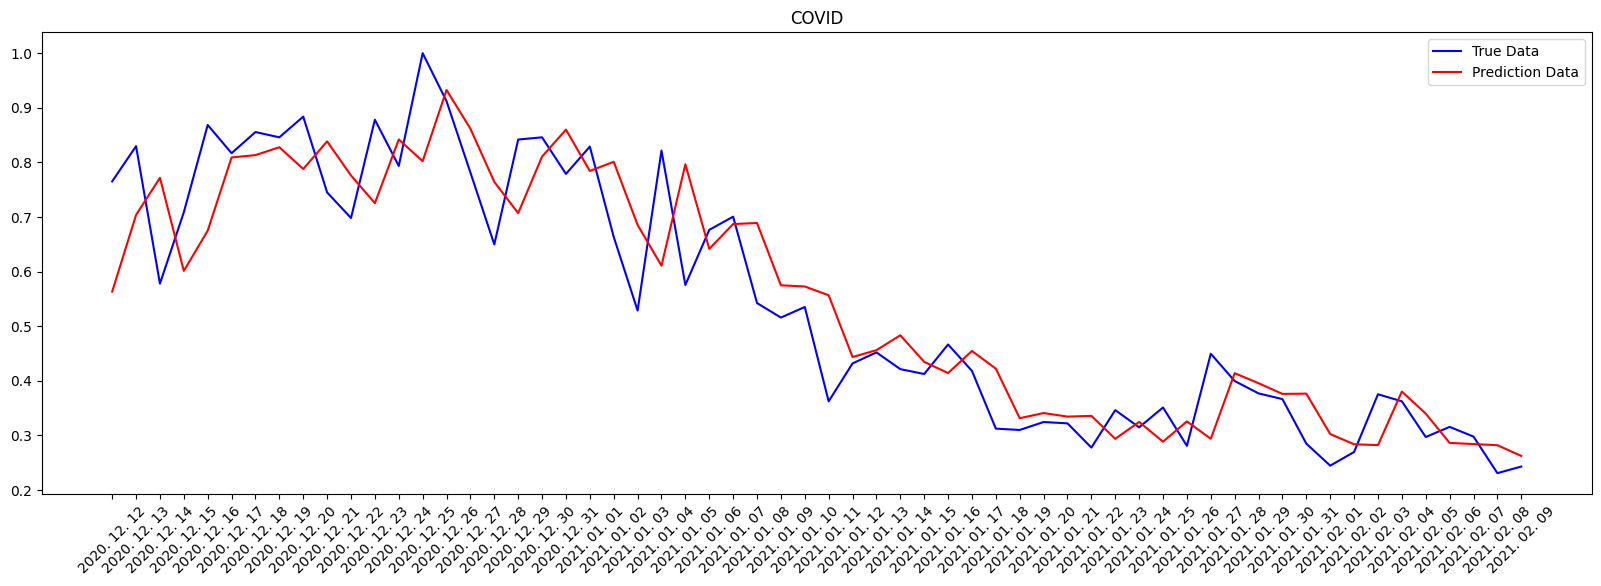

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(data.index[-len(y_test):], y_test, label='True Data', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Prediction Data', color="red")
plt.title('COVID')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 원 데이터로 시각화

In [31]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = scaler.inverse_transform(y_pred)

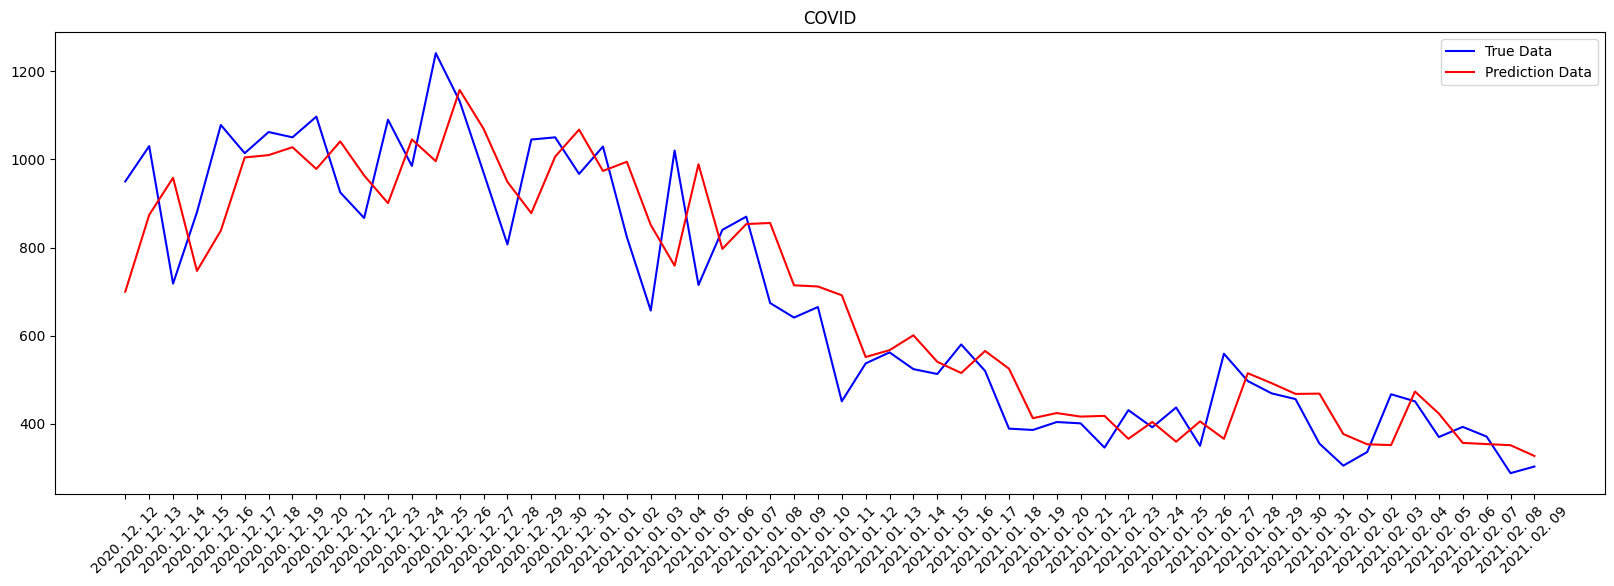

In [32]:
plt.figure(figsize=(20, 6))
plt.plot(data.index[-len(y_test):], y_test_unscaled, label='True Data', color='blue')
plt.plot(data.index[-len(y_test):], y_pred_unscaled, label='Prediction Data', color="red")
plt.xticks(rotation=45)
plt.title('COVID')
plt.legend()
plt.show()

In [33]:
arr = np.arange(10)

In [34]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
arr[-3:]

array([7, 8, 9])